In [75]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load Datasets ===
air = pd.read_csv('airquality.csv')
heart = pd.read_csv('heart.csv') 
fb_data = pd.read_csv('fb.csv') 

# === 2. Data Cleaning (already done) ===
# Drop unnamed/index columns
air.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')
heart.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

# Fill nulls
air.fillna(method='pad', inplace=True)
heart.fillna(method='pad', inplace=True)

# === 3. Data Transformation (already done) ===
columns_to_transform = ['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day']
columns_to_transform = [col for col in columns_to_transform if col in air.columns]

# Standard Scaling
scaler_std = StandardScaler()
standard_scaled = scaler_std.fit_transform(air[columns_to_transform])

# MinMax Scaling
scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(air[columns_to_transform])

# Binarization
binarizer = Binarizer(threshold=0.5)
binarized_data = binarizer.fit_transform(minmax_scaled)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19896\2395173502.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air.fillna(method='pad', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19896\2395173502.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  heart.fillna(method='pad', inplace=True)


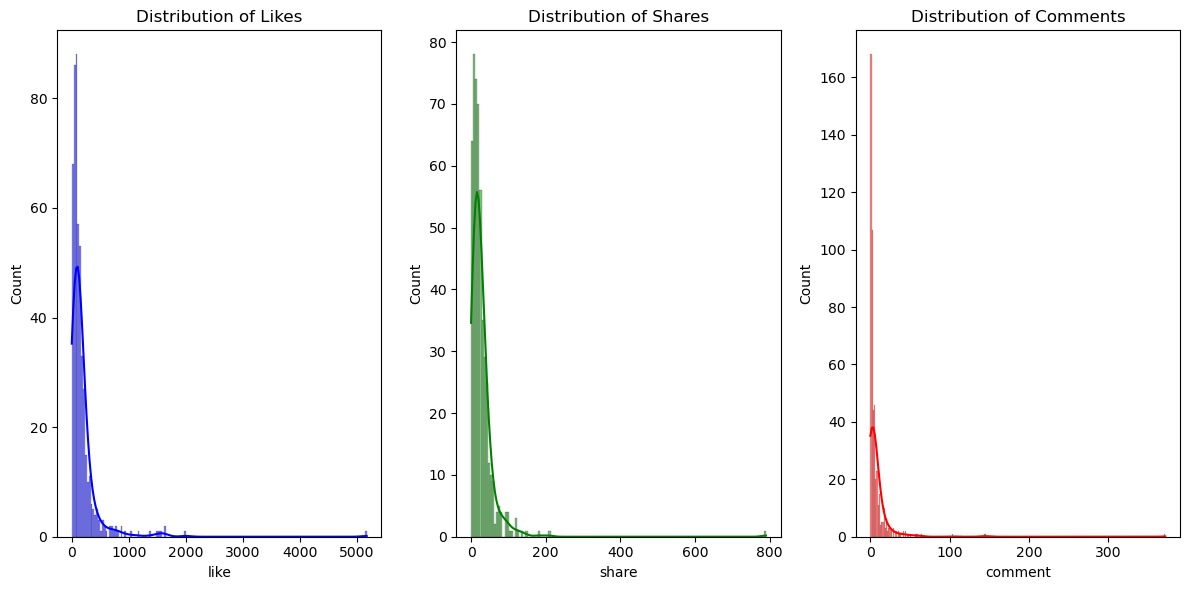

In [77]:
# Visualizing the distribution of Likes, Shares, and Comments
plt.figure(figsize=(12, 6))

# Plot histogram for likes
plt.subplot(1, 3, 1)
sns.histplot(fb_data['like'], kde=True, color='blue')
plt.title('Distribution of Likes')

# Plot histogram for shares
plt.subplot(1, 3, 2)
sns.histplot(fb_data['share'], kde=True, color='green')
plt.title('Distribution of Shares')

# Plot histogram for comments
plt.subplot(1, 3, 3)
sns.histplot(fb_data['comment'], kde=True, color='red')
plt.title('Distribution of Comments')

plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19896\2715234409.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=fb_data, palette='Set2')


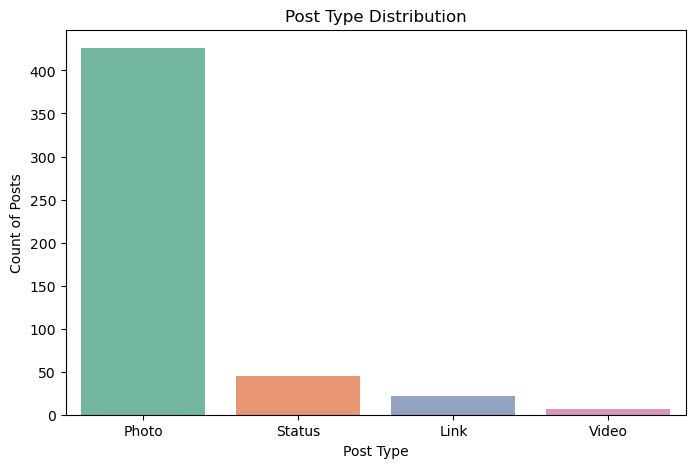

In [78]:
# Count plot for post type
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', data=fb_data, palette='Set2')
plt.title('Post Type Distribution')
plt.xlabel('Post Type')
plt.ylabel('Count of Posts')
plt.show()

In [81]:
# Scatter plot for Likes vs Shares
plt.figure(figsize=(8, 5))
sns.scatterplot(x='like', y='share', data=fb_data, color='purple')
plt.title('Likes vs Shares')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Shares')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19896\394014160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Post Month', data=fb_data, palette='Pastel1')


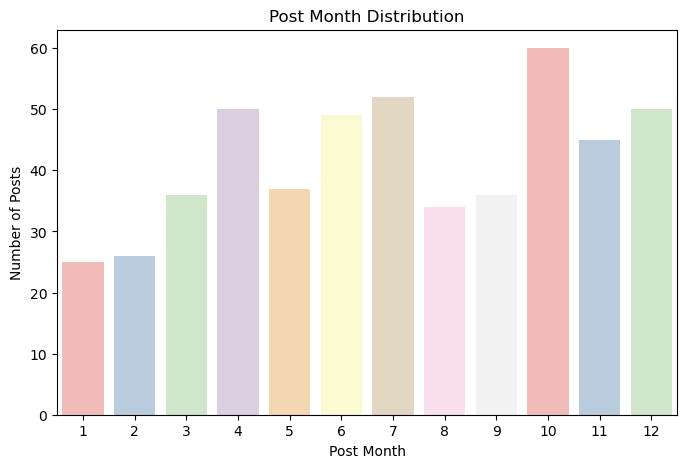

In [83]:
# Count plot for Post Month
plt.figure(figsize=(8, 5))
sns.countplot(x='Post Month', data=fb_data, palette='Pastel1')
plt.title('Post Month Distribution')
plt.xlabel('Post Month')
plt.ylabel('Number of Posts')
plt.show()

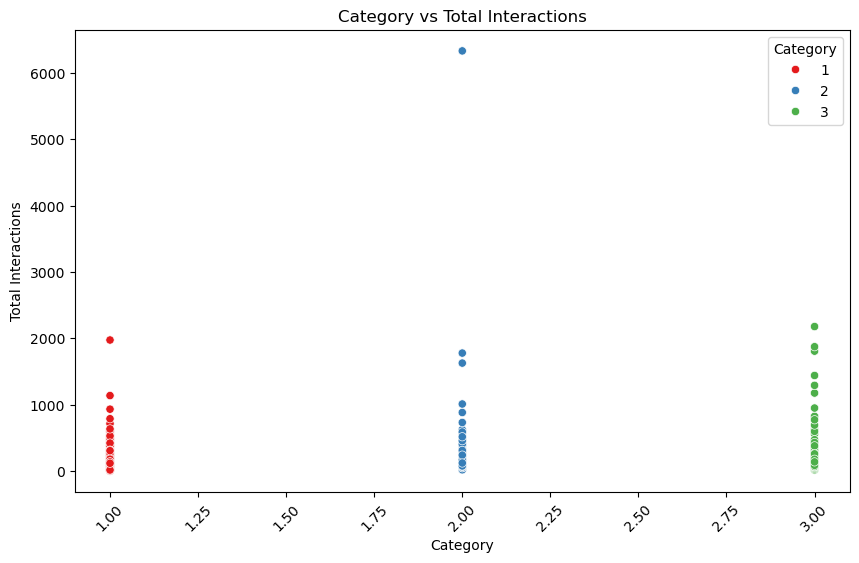

In [85]:
# Scatter plot for Category vs Total Interactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Category', y='Total Interactions', data=fb_data, hue='Category', palette='Set1')
plt.title('Category vs Total Interactions')
plt.xlabel('Category')
plt.ylabel('Total Interactions')
plt.xticks(rotation=45)
plt.show()

In [87]:
# Scatter plot for Lifetime Post Consumers vs Consumptions
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Lifetime Post Consumers', y='Lifetime Post Consumptions', data=fb_data, color='orange')
plt.title('Lifetime Post Consumers vs Consumptions')
plt.xlabel('Lifetime Post Consumers')
plt.ylabel('Lifetime Post Consumptions')
plt.show()

In [89]:
# === Visualization (Assignment 5 - Linear Regression on Air Quality) ===
# Scatter plot of actual vs predicted values (before model creation)
plt.figure(figsize=(10, 6))
plt.scatter(air['Ozone'], air['Temp'], color='skyblue', label='Actual')
plt.title('Ozone vs Temperature')
plt.xlabel('Ozone')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

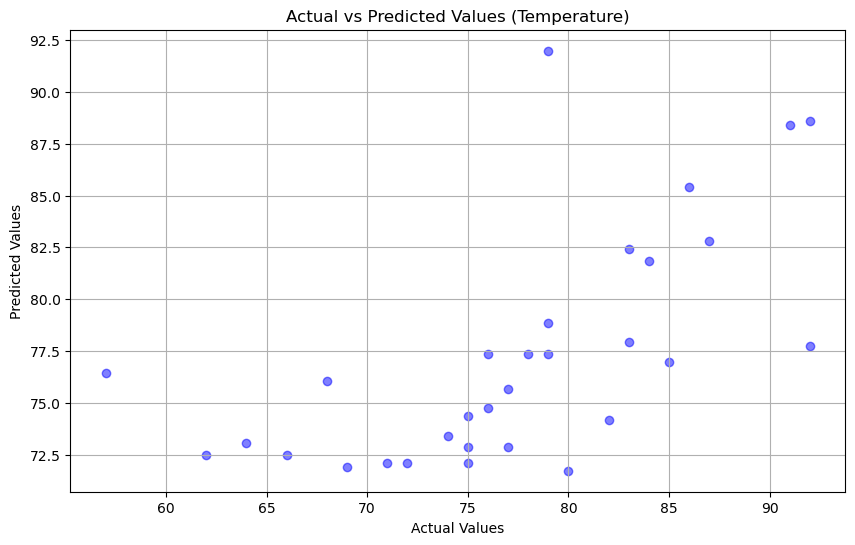

In [91]:
# Train-test split
X = air[['Ozone']]
Y = air['Temp']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model initialization and training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values (Temperature)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [93]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red', alpha=0.5)
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19896\2764997271.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=heart, palette='Set1')  # Corrected to 'output'


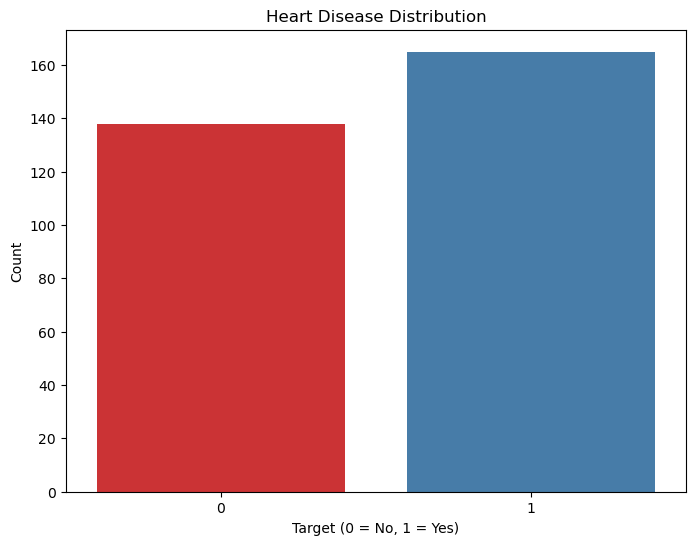

In [95]:
# === Visualization (Assignment 5 - Heart Disease Dataset) ===
# Plotting the distribution of the target variable (Heart Disease)
plt.figure(figsize=(8, 6))
sns.countplot(x='output', data=heart, palette='Set1')  # Corrected to 'output'
plt.title('Heart Disease Distribution')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

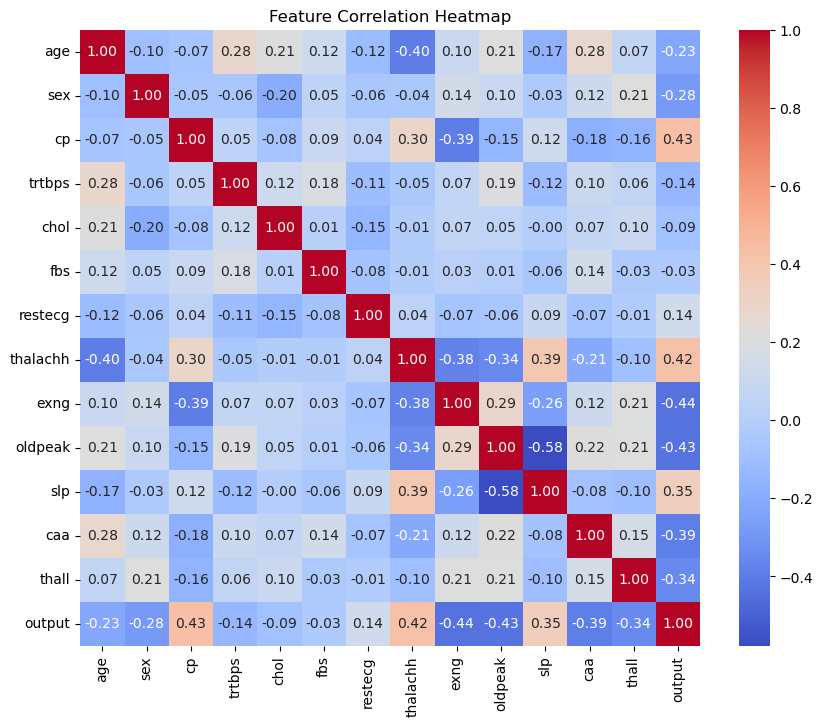

In [97]:
# Correlation heatmap to visualize relationships between features
correlation_matrix = heart.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19896\4155439878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='output', y='age', data=heart, palette='Set1')


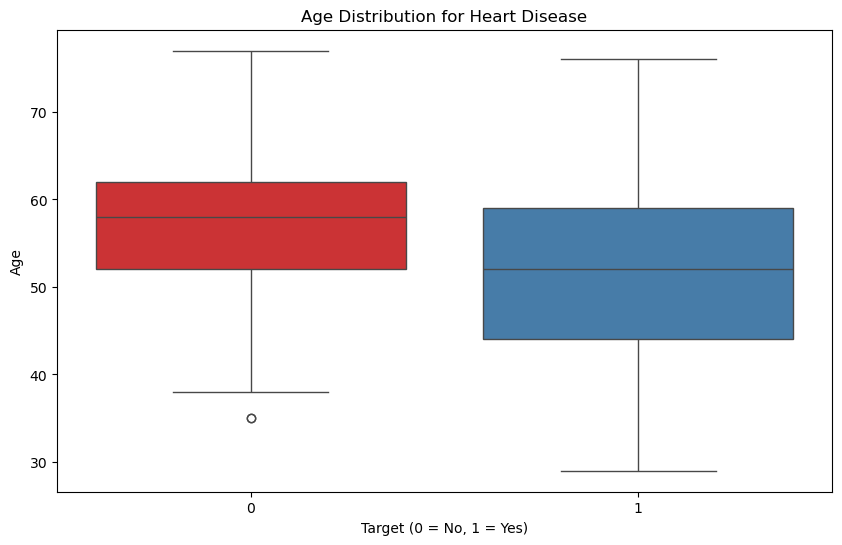

In [99]:
# Age vs Output (Heart Disease)
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='age', data=heart, palette='Set1') 
plt.title('Age Distribution for Heart Disease')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

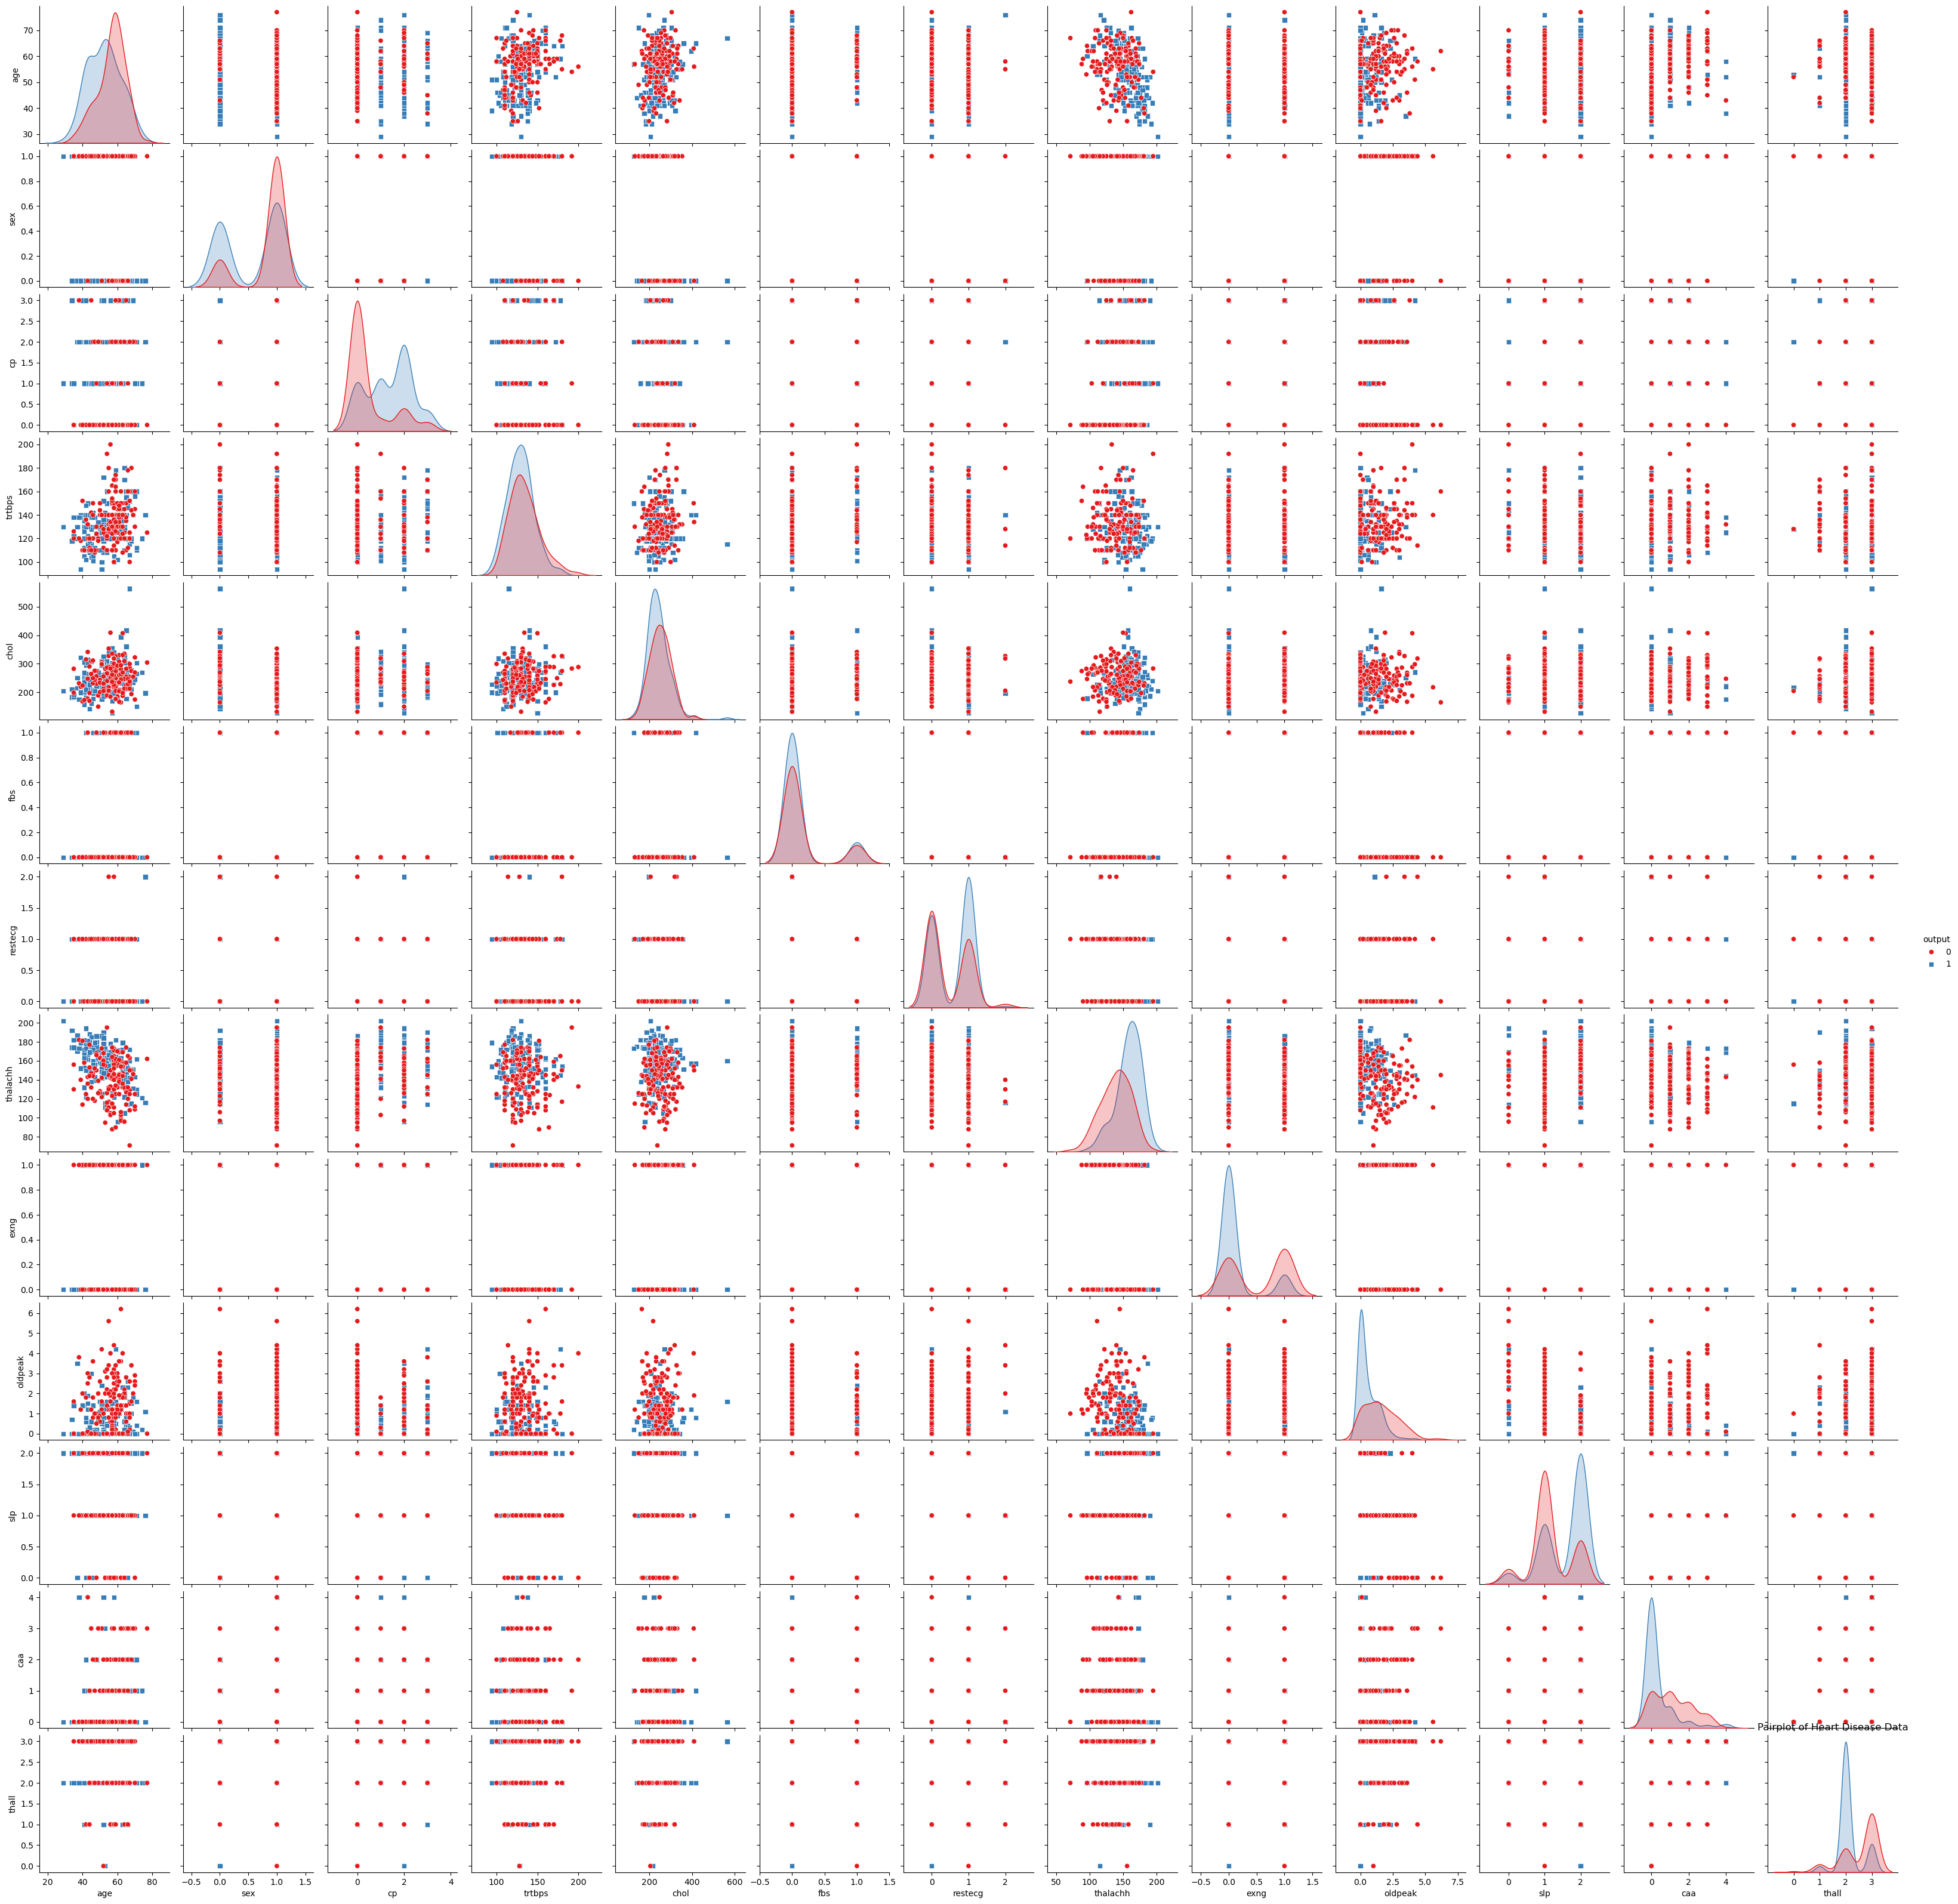

In [46]:
# === Pairplot for Heart Dataset===
# Visualize relationships between features with the 'output' column as the hue
sns.pairplot(heart, hue='output', palette='Set1', markers=['o', 's'])
plt.title('Pairplot of Heart Disease Data')
plt.show()